/tmp/ipykernel_26706/2892297381.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=45)


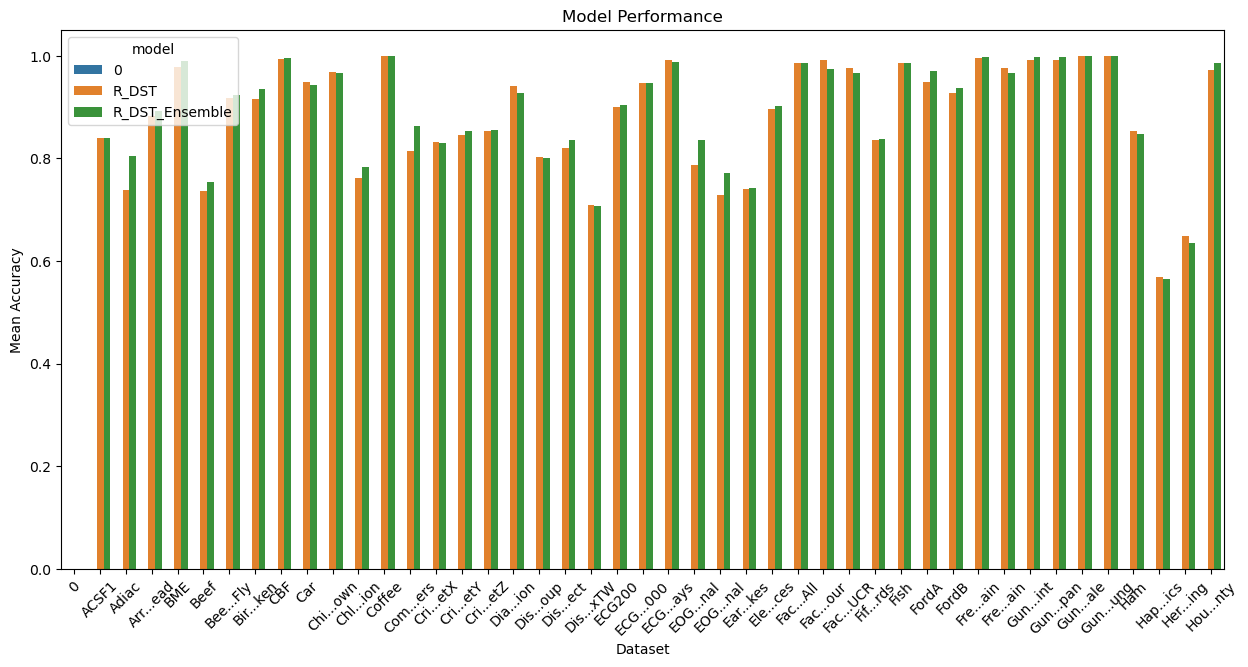

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载CSV文件
df = pd.read_csv('./New_CV_30_results_default.csv')

# 创建一个新的DataFrame，其中包含每个模型在每个数据集上的平均准确率
df_mean = df.groupby(['dataset', 'model'])['acc_mean'].mean().unstack().reset_index()

# 使用seaborn绘制条形图
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df_mean.melt(id_vars='dataset', value_name='acc_mean', var_name='model'), x='dataset', y='acc_mean', hue='model')
plt.title('Model Performance')
plt.xlabel('Dataset')
plt.ylabel('Mean Accuracy')

# 截取并显示部分x轴标签
new_labels = [label[:3] + '...' + label[-3:] if len(label) > 6 else label for label in df_mean['dataset']]
ax.set_xticklabels(new_labels, rotation=45)

# 显示图表
plt.show()
